In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import gzip
style.use('ggplot')

# Load in csv
violence_pd = pd.read_csv(gzip.open('../data/gun_violence_massshooting_2014-2018.csv.gz'))
path = pd.read_excel("b_guns_17.xlsx")
laws_df = path
laws_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/gun_violence_massshooting_2014-2018.csv.gz'

In [155]:
#remove uneeded columns from dataframe
cleaned_laws_df = laws_df.drop(columns=['ccpi', 'Bpurge', 'baow', 'btrain'], axis = 1)
cleaned_laws_df.fillna(0, inplace=True)
cleaned_laws_df['bipt'].replace(25, 0, inplace = True)
cleaned_laws_df.head()

,State,Year,bccpir,bccpin,bsi,Bipcraw,bipc,bipt,Bplaces,Bopen,...,Bchild,baurnh,Bballist,bdtr,Bretent,Bconst,bmg,bss,bsbr,bsbs
0,State,Year,Concealed carry permits issued to residents? (...,Concealed carry permits issued to nonresidents...,Concealed carry permits are shall-issue? (2 if...,"Initial permit cost in dollars, excluding trai...",Initial permit cost in 2006 dollars (twice the...,"Initial permit term (0 if no permits issued, 2...","Is loaded handgun carry permitted in bars, ban...",Open carry of loaded handgun (permitted withou...,...,Child access prevention laws? (3=criminal liab...,"Authorized user requirement for new handguns, ...",Ballistic identification OR microstamping requ...,Law specifying no duty to retreat before using...,"Retention of sales records? (1=kept by state, ...",State constitution contains individual right t...,Machine Guns (1 if not prohibited by state law...,Sound Suppressor (Silencers) (1 if not prohibi...,SBR (Short Barreled Rifle) (1 if not prohibite...,SBS (Short Barreled Shotgun) (1 if not prohibi...
1,Alabama,1986,1,0,0,1,1.83942,1,0,2,...,0,0,0,0,1,1,1,1,0,0
2,Alaska,1986,0,0,0,0,828,0,0,2,...,0,0,0,0,0.25,0,1,1,1,1
3,Arizona,1986,0,0,0,0,828,0,1,2,...,0,0,0,0,0,1,1,1,1,1
4,Arkansas,1986,0,0,0,0,828,0,0,0,...,0,0,0,0,0,1,0.5,1,1,1


In [197]:
#drop non-scoring columns from dataframe
scores_df = cleaned_laws_df.drop(['Boci', 'bcci', 'bipc', 'Bipcraw', 'bipt', 'blic'], axis=1)
scores_df.head()
df = scores_df.iloc[1:]
df.head()

,State,Year,bccpir,bccpin,bsi,Bplaces,Bopen,Bjourn,Bpreoc,Bprecc,...,Bchild,baurnh,Bballist,bdtr,Bretent,Bconst,bmg,bss,bsbr,bsbs
1,Alabama,1986,1,0,0,0,2,1,1,1,...,0,0,0,0,1,1,1,1,0,0
2,Alaska,1986,0,0,0,0,2,2,0,0,...,0,0,0,0,0.25,0,1,1,1,1
3,Arizona,1986,0,0,0,1,2,2,1,1,...,0,0,0,0,0,1,1,1,1,1
4,Arkansas,1986,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0.5,1,1,1
5,California,1986,1,0,0,0,0,1,1,1,...,0,0,0,0.5,1,0,0,0,0,0


In [198]:
#Fix Bchild column values to fill from prior year's data
states = df.State.unique()
for state in states:
    data = df[(df['State'] == state) & (df['Year'] == 2014)]['Bchild']
    df.loc[(df['State'] == state) & (df['Year'] == 2015), 'Bchild'] = data.item()
    df.loc[(df['State'] == state) & (df['Year'] == 2016), 'Bchild'] = data.item()
df.reset_index(drop = True, inplace = True)

C:\Users\Norman\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [217]:
#Fix binsp column values to fill from prior year's data
for state in states:
    datax = df[(df['State'] == state) & (df['Year'] == 2008)]['binsp']
    df.loc[(df['State'] == state) & (df['Year'] == 2014), 'binsp'] = datax.item()
    df.loc[(df['State'] == state) & (df['Year'] == 2015), 'binsp'] = datax.item()
    df.loc[(df['State'] == state) & (df['Year'] == 2016), 'binsp'] = datax.item()
df.reset_index(drop = True, inplace = True)

C:\Users\Norman\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_la

In [218]:
#Fix baurnh column values to fill from prior year's data
for state in states:
    datay = df[(df['State'] == state) & (df['Year'] == 2014)]['baurnh']
    df.loc[(df['State'] == state) & (df['Year'] == 2015), 'baurnh'] = datay.item()
    df.loc[(df['State'] == state) & (df['Year'] == 2016), 'baurnh'] = datay.item()
df.reset_index(drop = True, inplace = True)

C:\Users\Norman\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [221]:
#Fix Bnpg column values to fill from prior year's data
for state in states:
    dataz = df[(df['State'] == state) & (df['Year'] == 2014)]['Bnpg']
    df.loc[(df['State'] == state) & (df['Year'] == 2015), 'Bnpg'] = dataz.item()
    df.loc[(df['State'] == state) & (df['Year'] == 2016), 'Bnpg'] = dataz.item()
df.reset_index(drop = True, inplace = True)

C:\Users\Norman\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Norman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [222]:
#view all columns 
pd.set_option("max_columns", len(scores_df))
scores_df.head()

,State,Year,bccpir,bccpin,bsi,Bplaces,Bopen,Bjourn,Bpreoc,Bprecc,Basslt,Bmags,Brifle,Bgunban,Bnpg,Bminage,Bwait,Bmult,Bdealer,bstheft,bssp,binsp,botheft,Bpriv,Blicens,blicst,Bregis,Bdesign,Blocks,Bchild,baurnh,Bballist,bdtr,Bretent,Bconst,bmg,bss,bsbr,bsbs
0,State,Year,Concealed carry permits issued to residents? (...,Concealed carry permits issued to nonresidents...,Concealed carry permits are shall-issue? (2 if...,"Is loaded handgun carry permitted in bars, ban...",Open carry of loaded handgun (permitted withou...,Carry in motor vehicles (peaceable journey) (3...,State preemption of local open carry ordinance...,State preemption of local concealed carry ordi...,"Assault weapons ban? (1=yes, 0.5=locally, 0=no)",Large capacity ammunition magazines ban? (1=ye...,50 caliber rifles banned or regulated? (1=bann...,"Local gun ban in place? (1=sale & possession, ...",Non powder guns' use or possession regulated? ...,Stricter minimum age to purchase or possess fi...,Waiting period on firearms purchases? (1=all f...,"One handgun per month law? (1=yes, 0=no)",Licensing or regulation of gun dealers? (1=yes...,Gun dealer regulation: mandatory theft reporti...,"Store security precautions required? (1=yes, 0...","Police inspections of gun stores (1=required, ...",Owners required to report lost or stolen guns?...,Background checks required at private sales or...,Licensing or permitting of gun owners or purch...,safety training for licensees/permitees? (1=ye...,"Registration of firearms? (1=all firearms, 0.5...","Design safety standards for handguns (""Saturda...",Built-in locking devices required? (2=yes and ...,Child access prevention laws? (3=criminal liab...,"Authorized user requirement for new handguns, ...",Ballistic identification OR microstamping requ...,Law specifying no duty to retreat before using...,"Retention of sales records? (1=kept by state, ...",State constitution contains individual right t...,Machine Guns (1 if not prohibited by state law...,Sound Suppressor (Silencers) (1 if not prohibi...,SBR (Short Barreled Rifle) (1 if not prohibite...,SBS (Short Barreled Shotgun) (1 if not prohibi...
1,Alabama,1986,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
2,Alaska,1986,0,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,1,1,1,1
3,Arizona,1986,0,0,0,1,2,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,Arkansas,1986,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1,1


In [264]:
scores_clean = scores_df.loc[scores_df["Year"] == 2016, :]
scores_clean

,State,Year,bccpir,bccpin,bsi,Bplaces,Bopen,Bjourn,Bpreoc,Bprecc,Basslt,Bmags,Brifle,Bgunban,Bnpg,Bminage,Bwait,Bmult,Bdealer,bstheft,bssp,binsp,botheft,Bpriv,Blicens,blicst,Bregis,Bdesign,Blocks,Bchild,baurnh,Bballist,bdtr,Bretent,Bconst,bmg,bss,bsbr,bsbs
1403,Alabama,2016,1,0,1,0,2,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0.5,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
1406,Alaska,2016,2,2,2,0,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
1409,Arizona,2016,2,2,2,1,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
1412,Arkansas,2016,1,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1,1
1415,California,2016,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0.5,0,1,1,0.5,1,1,1,3,0,1,0.5,1,0,0,0,0,0
1418,Colorado,2016,1,0,1,1,2,3,0.5,1,0.5,1,0,0,1,0,0,0,0,0,0,0.5,0,1,0,0,0,0,0,0.5,0,0,0.5,0.5,1,1,1,1,1
1421,Connecticut,2016,1,1,0.5,0,1,1,0,0,1,1,0.5,0,1,1,0,0,1,0,1,0.5,1,1,1,1,0.5,0,1,1,0,0,0.5,1,1,0.5,1,1,1
1424,Delaware,2016,1,0,0,0,2,2,0.5,1,0,0,0,0,1,1,0,0,1,0,0,0.5,1,1,0,0,0,0,0,0.5,0,0,0.5,0.5,1,0,0,1,0
1427,Florida,2016,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0.5,0,0.5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1
1430,Georgia,2016,1,0,1,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0.5,0,0,1,0,1,1,1,1,1


In [388]:
#Convert state gun law ratings from dataframe into an single average score per state
lax_scores = [2, 3, 4, 5, 6, 7, 8, 9 , 32, 34, 35, 36, 37, 38]
strict_scores = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33]

lax_averages = []
strict_averages = []
strict2_averages = []
strict3_averages = []

for state in states:
    lax_total = 0
    strict_total = 0
    for x in range (0,13):
        lax_value = scores_clean.loc[(scores_clean['State'] == state)].iloc[:,lax_scores[x]]
        lax_total = lax_total +  lax_value
    lax_averages.append(lax_total/13)
    for y in range (0,20):
        strict_value = scores_clean.loc[(scores_clean['State'] == state)].iloc[:,strict_scores[y]]
        strict_total = strict_total + strict_value
    strict_averages.append(strict_total/21)
    strict2_averages.append(scores_clean.loc[(scores_clean['State'] == state)].iloc[:,28])
    strict3_averages.append(scores_clean.loc[(scores_clean['State'] == state)].iloc[:,29])

In [340]:
#normalize strict averages by reversing them so they are on the same scale as lax averages
normalized_strict_avg = []
normalized_strict2_avg = []
normalized_strict3_avg = []

for x in range (0, 50):
    corrected_avg = 1 - strict_averages[x]
    normalized_strict_avg.append(corrected_avg)
    corrected2_avg = 2 - strict2_averages[x]
    normalized_strict2_avg.append(corrected2_avg)
    corrected3_avg = 3 - strict3_averages[x]
    normalized_strict3_avg.append(corrected3_avg)

In [364]:
#combine normalized strict and lax averages to get 1 average law score per state
law_scores = []
for x in range (0, 50):
    state_average = (3-((lax_averages[x] + normalized_strict_avg[x] + normalized_strict2_avg[x] + normalized_strict3_avg[x])/4))
    law_scores.append(state_average)

In [365]:
#create dataframe of state's law scores
law_score = {"State": states, "Law Score": law_scores}
state_score_pd = pd.DataFrame(law_score, index = states)
state_score_pd

,Law Score,State
Alabama,1403 1.28709 dtype: object,Alabama
Alaska,1406 1.16575 dtype: object,Alaska
Arizona,1409 1.14652 dtype: object,Arizona
Arkansas,1412 1.32921 dtype: object,Arkansas
California,1415 2.60394 dtype: object,California
Colorado,1418 1.40339 dtype: object,Colorado
Connecticut,1421 1.97344 dtype: object,Connecticut
Delaware,1424 1.5174 dtype: object,Delaware
Florida,1427 1.57418 dtype: object,Florida
Georgia,1430 1.38095 dtype: object,Georgia


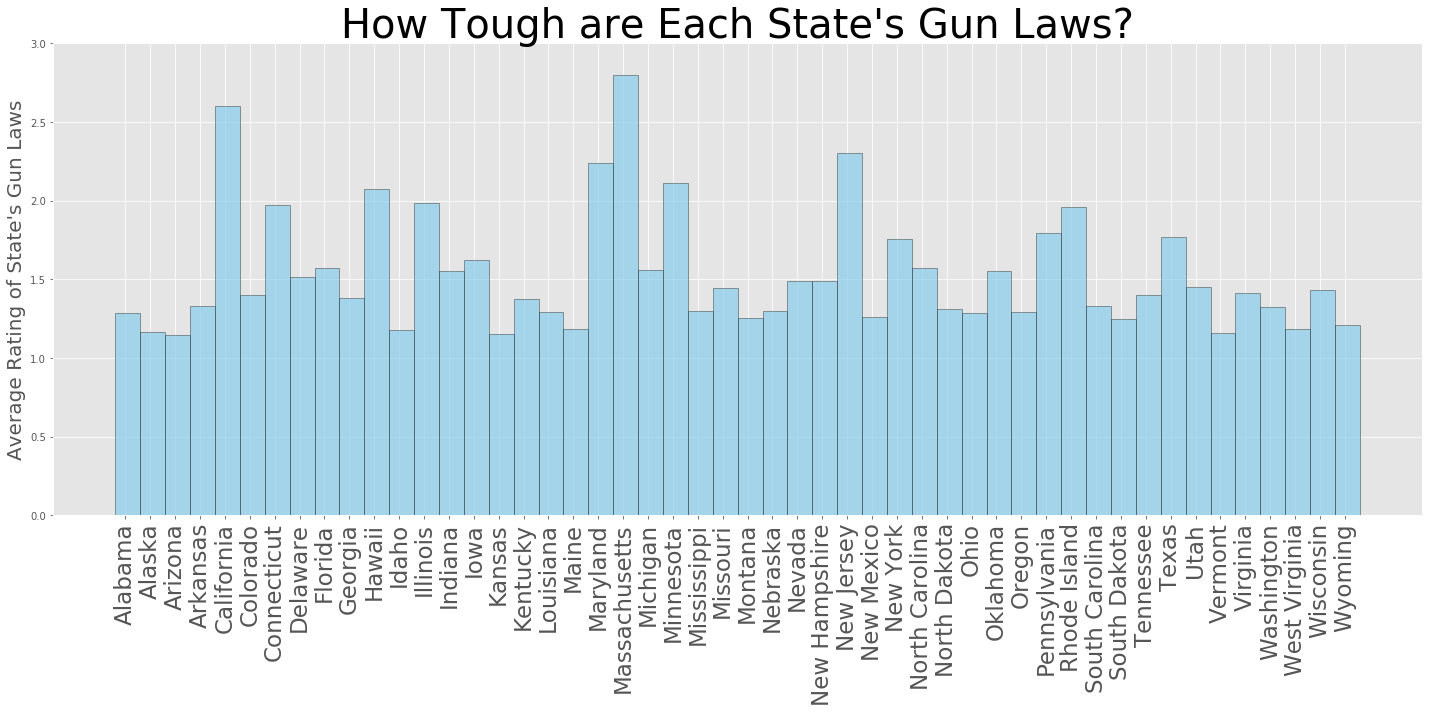

In [391]:
#show dataframe in bar chart format
plt.figure(figsize=(20,10))
x_axis = np.arange(len(state_score_pd))
tick_locations = [value+0.4 for value in x_axis]

plt.bar(state_score_pd['State'], state_score_pd['Law Score'], width=1.0, alpha = 0.7, color = 'skyblue', align='edge', edgecolor = 'black')

# Set the xlabel and ylabel using class methods
plt.xticks(tick_locations, state_score_pd['State'], rotation=90)
plt.ylim(0, 3) 
plt.ylabel("Average Rating of State's Gun Laws", fontsize = 20)
plt.title("How Tough are Each State's Gun Laws?", fontsize=40) 
plt.xticks(fontsize=23)
plt.tight_layout()

plt.show()

In [384]:
violence_pd.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,sum n_killed&n_injured,latitude,longitude,n_guns_involved,STATE,gun_type,incident_characteristics,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,# of Victims,# of Suspects,# of Male Victims,# of Female Victims,# of Male Suspects,# of Female Suspects
0,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,4,41.4455,-82.1377,2.0,OH,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,3,2,3.0,0.0,2.0,0.0
1,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,4,36.1140,-79.9569,2.0,NC,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1,2.0,1.0,0.0,1.0
2,479363,1/19/2013,New Mexico,Albuquerque,2806 Long Lane,5,0,5,34.9791,-106.7160,2.0,NM,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5,1,2.0,3.0,1.0,0.0
3,491674,1/23/2013,Tennessee,Chattanooga,1501 Dodds Ave,1,3,4,35.0221,-85.2697,1.0,TN,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Demetrius Davis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1,NaN,NaN,NaN,NaN
4,479413,1/25/2013,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,4,38.7067,-90.2494,1.0,MO,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::28,0::Adult 18+,0::Male,0::Terry Robinson Jr.,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1,NaN,NaN,NaN,NaN


In [1]:
state_incidents_df = violence_pd.set_index("state")
state_incidents_df.drop(['District of Columbia'])
state_incidents_df.

SyntaxError: invalid syntax (<ipython-input-1-b695082bdd0c>, line 3)